In [1]:
# RNN on sine wave, using bp on weight matrix, enforce Dale's law
import sys
sys.path.append("../../model")
import numpy as np
from rnn_wt import RNN
import matplotlib.pyplot as plt
import json
import torch
import seaborn as sns

## Loading Trained Weights

In [2]:
num_nodes = 128
filedir = "../weights/"
filename = "SIN_wt_" + str(num_nodes) + "_nodes.json"
filepath = filedir + filename
with open(filepath) as f:
    weight_history = json.load(f)

In [3]:
weight_history.keys()

dict_keys(['trained gain', 'trained shift', 'trained weights', 'connectivity matrix', 'input weights', 'output weights', 'losses', 'init_weight'])

In [4]:
gains = np.array(weight_history['trained gain'])
shifts = np.array(weight_history['trained shift'])
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weight_matrix = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])
losses = np.array(weight_history['losses'])

# test oja
# weight_sums = np.array(weight_history['weight_sums'])
# gain_changes = np.array(weight_history['gain_changes'])

In [5]:
gains

array([[ 0.65053326],
       [ 0.72271985],
       [-0.70646214],
       [-1.12787604],
       [-0.23286708],
       [ 1.39174831],
       [ 0.13787764],
       [-0.54884481],
       [-0.73465532],
       [ 0.59157091],
       [-1.58208454],
       [ 2.72809577],
       [-1.76880348],
       [ 0.07258648],
       [ 0.7754693 ],
       [ 0.61464554],
       [-0.04950132],
       [-1.452178  ],
       [-0.95214689],
       [-0.40953124],
       [-0.40673837],
       [ 0.53029776],
       [ 0.38886732],
       [-0.69617987],
       [-0.72901767],
       [ 0.13105886],
       [ 0.19944043],
       [ 0.3460052 ],
       [-0.05728598],
       [-0.27553698],
       [-1.25581944],
       [-0.43894529],
       [ 0.03532122],
       [ 0.24799982],
       [-1.7855227 ],
       [-1.44701123],
       [ 0.66795605],
       [ 0.01538541],
       [ 0.09941888],
       [ 1.06302249],
       [-0.63418782],
       [-0.46927556],
       [ 0.5607779 ],
       [ 1.31335402],
       [ 0.42663643],
       [ 0

In [6]:
input_weight_matrix

array([[ 0.59576024,  0.34881003,  0.41005357,  0.31548025, -1.18507813,
        -0.86604658,  1.33859049,  0.49574439, -0.26311414,  1.39292831,
        -1.48333433, -0.05588698, -0.47576577,  1.01692905, -0.74293881,
        -0.25264813, -0.60630958, -1.21646834,  0.32469593, -1.10518285,
         0.32759797, -0.21535801, -1.54135677, -0.66428963, -1.13586465,
         0.40066716,  0.35604279,  2.00992864, -1.05293217, -0.41408794,
         0.40870192,  1.43142046,  0.43932051, -1.17419748, -1.88043802,
         0.70077759, -1.29853931, -1.24919817,  0.24717261, -0.0462419 ,
        -1.60482196,  0.32412627, -0.64883048, -1.57420362,  1.17173836,
         0.13570934, -0.93709204, -0.59478784,  2.12396847,  1.05019638,
         1.29210022,  0.04335982,  1.13917248,  1.04290578,  0.20599105,
         0.8376641 ,  2.12089155,  0.83759462, -0.73975396,  0.06544194,
         0.37032335, -0.0202894 ,  0.49936236, -0.40653447, -1.68376363,
         1.40418462,  2.04734825,  1.66285716,  0.7

In [7]:
output_weight_matrix

array([[ 0.05997294,  0.02951659,  0.14006702, -0.05951803,  0.04101348,
        -0.12012718,  0.07715785,  0.00253327, -0.1382881 , -0.02609125,
         0.05417437,  0.00677452, -0.03663977,  0.05221458, -0.05568922,
        -0.02981092, -0.07241229,  0.12391197,  0.02673333, -0.10698803,
        -0.03884721, -0.01648393,  0.13824869, -0.1655926 , -0.06269508,
        -0.11471037,  0.05089436,  0.04132141, -0.01031232,  0.13880453,
        -0.04245677,  0.00750584, -0.17357041, -0.05955126, -0.01541168,
         0.08179076, -0.1154517 , -0.02865327,  0.07544354, -0.04613714,
         0.04301867, -0.14323582,  0.03666518, -0.02543611, -0.16729511,
         0.06284887, -0.22490375,  0.09827699,  0.10724998, -0.12970693,
        -0.12458298, -0.04930961, -0.0172075 ,  0.02162412,  0.08146209,
        -0.16933742,  0.05641141, -0.18928349,  0.02424794,  0.1352077 ,
        -0.02058393,  0.1839772 , -0.12869319,  0.16362429,  0.04456968,
        -0.04592192, -0.04001534, -0.02930101,  0.0

<Axes: >

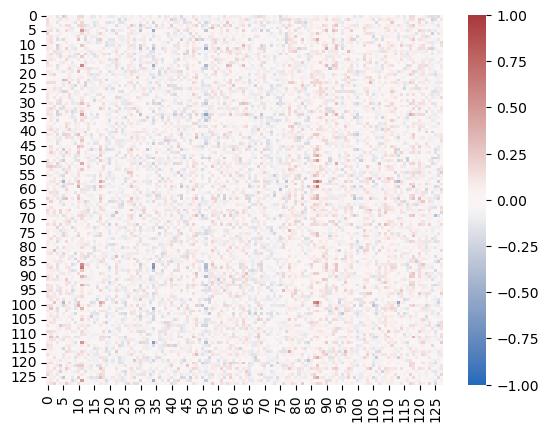

In [8]:
sns.heatmap(weight_matrix, vmax=1, vmin=-1, cmap='vlag')

In [9]:
np.sum(weight_matrix)

-7.116063277778858

<Axes: >

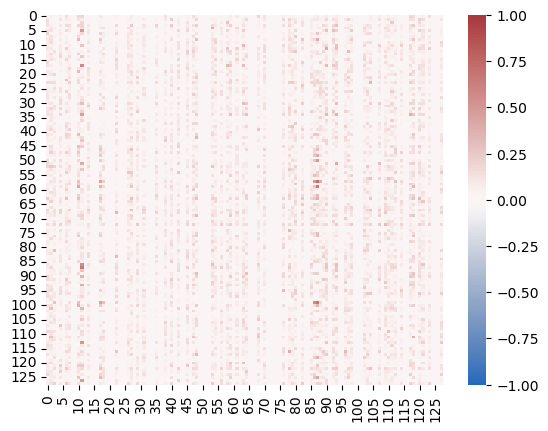

In [10]:
excite_weights = weight_matrix * (weight_matrix > 0)
sns.heatmap(excite_weights, vmax=1, vmin=-1, cmap='vlag')

In [11]:
np.sum(excite_weights)

611.5110107032734

In [12]:
# estimate oja's alpha
1 / np.linalg.norm(excite_weights, None)**2

0.012154964089700118

## Defining Network

In [13]:
time_constant = 100 #ms
timestep = 10 #ms
time = 3000 #ms
num_inputs = 1
num_nodes = 128
init_activations = np.zeros((num_nodes, 1))

network = RNN(weight_matrix, connectivity_matrix, init_activations, gains, shifts, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)

100%|██████████| 300/300 [00:00<00:00, 3574.95it/s]


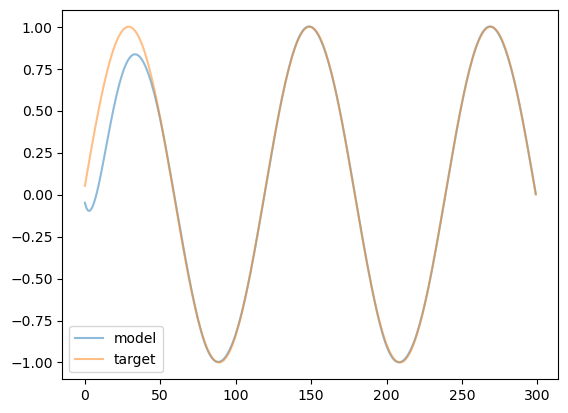

In [14]:
time_points = np.arange(300).reshape(-1, 1)
# inputs = (1 + np.sin(time_points/60*np.pi))/2
# targets = (1 + np.sin((time_points+1)/60*np.pi))/2
inputs = np.sin(time_points/60*np.pi)
targets = np.sin((time_points+1)/60*np.pi)
# inputs = np.sin(time_points/60*np.pi) / 4 + 0.5
# targets = np.sin((time_points+1)/60*np.pi) / 4 + 0.5
inputs = inputs.reshape(-1, 1)
targets = targets.reshape(-1, 1)

outputs, activations = network.simulate(time, torch.tensor(inputs).float())
fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
# plt.plot(time_points, inputs)
plt.plot(time_points, targets, alpha=0.5, label='target')
# plt.ylim([0,1])
plt.legend()
# plt.savefig("fig/sin_oja_train.png")

100%|██████████| 300/300 [00:00<00:00, 18197.07it/s]


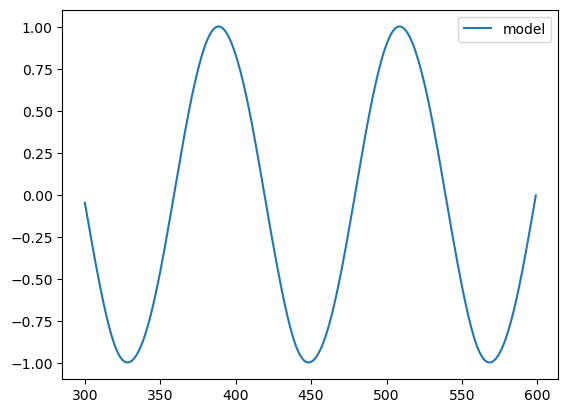

In [15]:
time_pred = 3000

time_points_pred = np.arange(300,600).reshape(-1, 1)
# inputs_pred = (1 + np.sin(time_points_pred/60*np.pi))/2
inputs_pred = np.sin(time_points_pred/60*np.pi)
# inputs_pred = np.sin(time_points_pred/60*np.pi) / 4 + 0.5

outputs_pred, activations_pred = network.simulate(time_pred, torch.tensor(inputs_pred).float())
fig, ax = plt.subplots()
plt.plot(time_points_pred, outputs_pred.detach().numpy(), label='model')
# plt.ylim([0,1])
plt.legend()
# plt.savefig("fig/sin_oja_pred.png")

(0.0, 0.5)

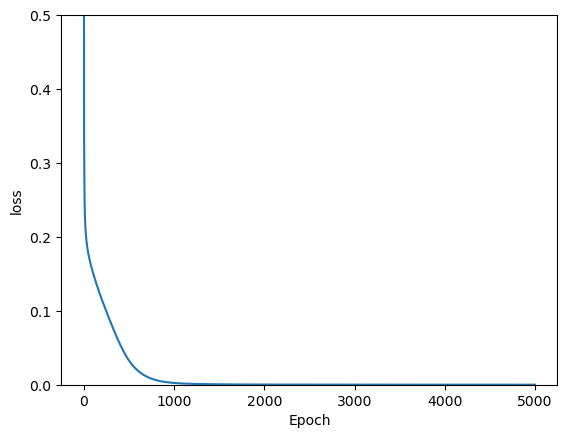

In [16]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.5])
# plt.savefig("fig/sin_oja_loss.png")